Importing Necessary Libararies

In [455]:
import pandas as pd
import numpy as np


Loading dataset

In [474]:
df = pd.read_csv('bike_rental.csv')

In [475]:
df.head(10).style.set_properties(**{
    'background-color': 'lightgrey',
    'color': 'darkblue',
    'border-color': 'black',
    'font-size': '14px',
    'text-align': 'center'
})


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.240000,0.257600,0.750000,0.089600,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.220000,0.272700,0.800000,0.000000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.200000,0.257600,0.860000,0.000000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.240000,0.287900,0.750000,0.000000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.320000,0.348500,0.760000,0.000000,8,6,14


In [476]:
df.shape


(17379, 17)

In [477]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {df.columns.tolist()}")

Number of rows: 17379
Number of columns: 17
Column names: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


Datatypes of all features

In [478]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [479]:
df.describe()   

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Preprocessing and transformation

In [480]:
missing_values = df.isnull().sum()    # for finding missing values 
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


The dataset have no missing values.

In [481]:
df.duplicated().sum()

0

The dataset have no duplicate rows. 

In [482]:
df = df.drop("instant", axis=1)    # dropping instant feature as it is not useful
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [483]:
# Convert dteday to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [484]:
df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True         # for understanding
)
df

,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


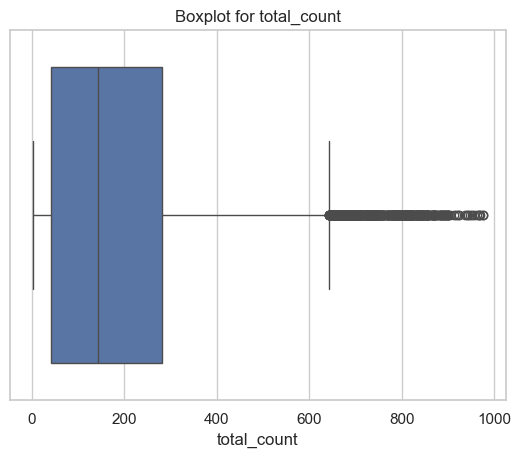

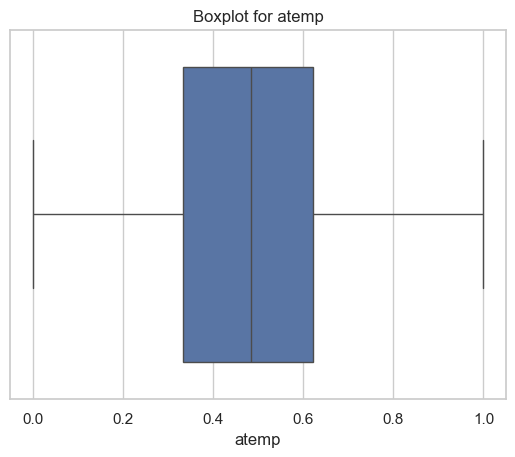

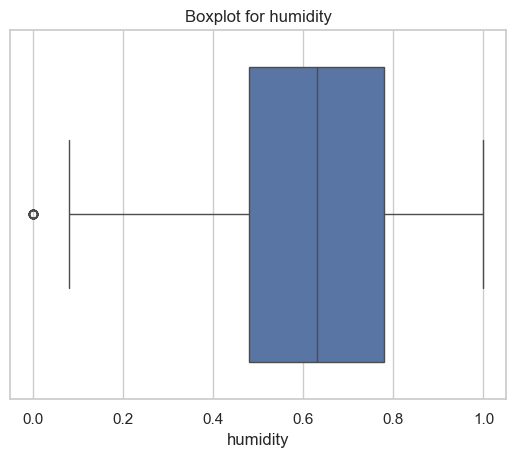

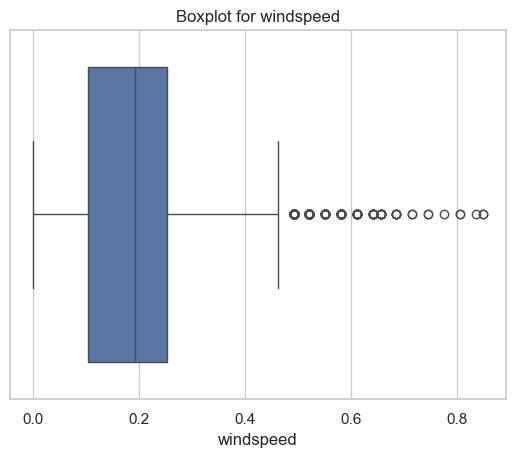

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check outliers for each numerical feature
for col in ['total_count', 'atemp', 'humidity', 'windspeed']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [486]:
#Checking ouliers in Target varibale "total_count".
Q1 = df['total_count'].quantile(0.25)  # Quartile - 1
Q3 = df['total_count'].quantile(0.75)  # Quartile - 3
IQR = Q3 - Q1     # Inter-Quartile range

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['total_count'] < lower_bound) | (df['total_count'] > upper_bound)]
outliers


,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
5536,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


In [487]:

df = df[(df['total_count'] >= lower_bound) & (df['total_count'] <= upper_bound)]    #removing outliers
print("shape after removal of outliers: ",df.shape)

shape after removal of outliers:  (16874, 16)


In [488]:
df_copy = df.copy()

#### One - hot encoding 

In [489]:
# Applying one-hot encoding to the 'weekday' feature
df = pd.get_dummies(df, columns=['weekday'], dtype=int)

# Renaming the columns for clarity
df.rename(columns={
    'weekday_0': 'Weekday_Monday',
    'weekday_1': 'Weekday_Tuesday',
    'weekday_2': 'Weekday_Wednesday',
    'weekday_3': 'Weekday_Thursday',
    'weekday_4': 'Weekday_Friday',
    'weekday_5': 'Weekday_Saturday',
    'weekday_6': 'Weekday_Sunday'
}, inplace=True)

# Display the updated DataFrame
df.head()


,date,season,year,month,hr,holiday,workingday,weather,temp,atemp,...,casual,registered,total_count,Weekday_Monday,Weekday_Tuesday,Weekday_Wednesday,Weekday_Thursday,Weekday_Friday,Weekday_Saturday,Weekday_Sunday
0,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,...,3,13,16,0,0,0,0,0,0,1
1,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,...,8,32,40,0,0,0,0,0,0,1
2,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,...,5,27,32,0,0,0,0,0,0,1
3,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,...,3,10,13,0,0,0,0,0,0,1
4,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,...,0,1,1,0,0,0,0,0,0,1


In [490]:
df = pd.get_dummies(df, columns=['season'], dtype=int)       # one hot encoding for better model learning 
df.rename(columns={'season_1': 'Season_Winter','season_2': 'Season_Spring', 'season_3': 'Season_Summer', 'season_4': 'Season_Fall'}, inplace=True)

df.head()

,date,year,month,hr,holiday,workingday,weather,temp,atemp,humidity,...,Weekday_Tuesday,Weekday_Wednesday,Weekday_Thursday,Weekday_Friday,Weekday_Saturday,Weekday_Sunday,Season_Winter,Season_Spring,Season_Summer,Season_Fall
0,2011-01-01,0,1,0,0,0,1,0.24,0.2879,0.81,...,0,0,0,0,0,1,1,0,0,0
1,2011-01-01,0,1,1,0,0,1,0.22,0.2727,0.80,...,0,0,0,0,0,1,1,0,0,0
2,2011-01-01,0,1,2,0,0,1,0.22,0.2727,0.80,...,0,0,0,0,0,1,1,0,0,0
3,2011-01-01,0,1,3,0,0,1,0.24,0.2879,0.75,...,0,0,0,0,0,1,1,0,0,0
4,2011-01-01,0,1,4,0,0,1,0.24,0.2879,0.75,...,0,0,0,0,0,1,1,0,0,0


In [491]:
# One-hot encoding for 'weather'
df = pd.get_dummies(df, columns=['weather'], dtype=int)

# Rename columns for clarity (optional)
df.rename(columns={
    'weather_1': 'Weather_Clear',
    'weather_2': 'Weather_Cloudy',
    'weather_3': 'Weather_Rain',
    'weather_4': 'Weather_Snow'
}, inplace=True)

In [492]:
# One-hot encoding for 'month'
df = pd.get_dummies(df, columns=['month'], dtype=int)

# Rename columns for clarity (optional)
df.rename(columns={
    'month_1': 'Month_January',
    'month_2': 'Month_February',
    'month_3': 'Month_March',
    'month_4': 'Month_April',
    'month_5': 'Month_May',
    'month_6': 'Month_June',
    'month_7': 'Month_July',
    'month_8': 'Month_August',
    'month_9': 'Month_September',
    'month_10': 'Month_October',
    'month_11': 'Month_November',
    'month_12': 'Month_December',
}, inplace=True)

# Display updated DataFrame
df.head()


,date,year,hr,holiday,workingday,temp,atemp,humidity,windspeed,casual,...,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December
0,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [493]:
# Cyclic Encoding
# Hour (0-23) - cyclical encoding
df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)

df

,date,year,hr,holiday,workingday,temp,atemp,humidity,windspeed,casual,...,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,hour_sin,hour_cos
0,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,3,...,0,0,0,0,0,0,0,0,0.000000,1.000000
1,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,8,...,0,0,0,0,0,0,0,0,0.258819,0.965926
2,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,5,...,0,0,0,0,0,0,0,0,0.500000,0.866025
3,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,3,...,0,0,0,0,0,0,0,0,0.707107,0.707107
4,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,0,...,0,0,0,0,0,0,0,0,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,11,...,0,0,0,0,0,0,0,1,-0.965926,0.258819
17375,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,8,...,0,0,0,0,0,0,0,1,-0.866025,0.500000
17376,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,7,...,0,0,0,0,0,0,0,1,-0.707107,0.707107
17377,2012-12-31,1,22,0,1,0.26,0.2727,0.56,0.1343,13,...,0,0,0,0,0,0,0,1,-0.500000,0.866025


# Exploratory Data Analysis (EDA)

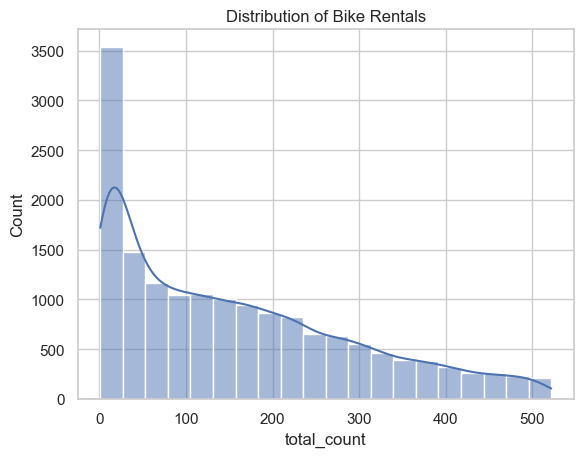

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of bike rentals (cnt)
sns.histplot(df_copy['total_count'], bins=20, kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()


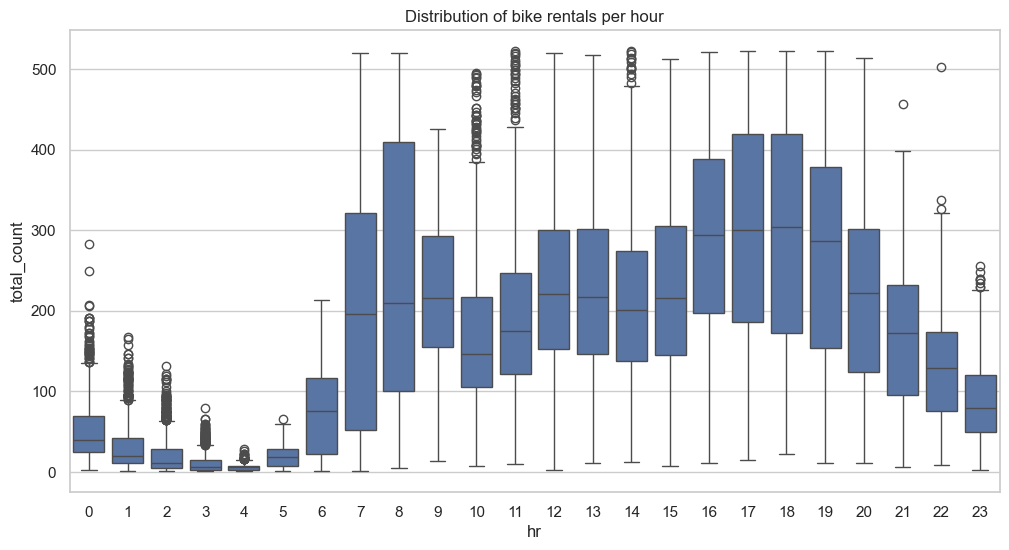

In [419]:

# Create a boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='hr', y='total_count', data=df_copy)

# Set the title
plt.title('Distribution of bike rentals per hour')
plt.show()


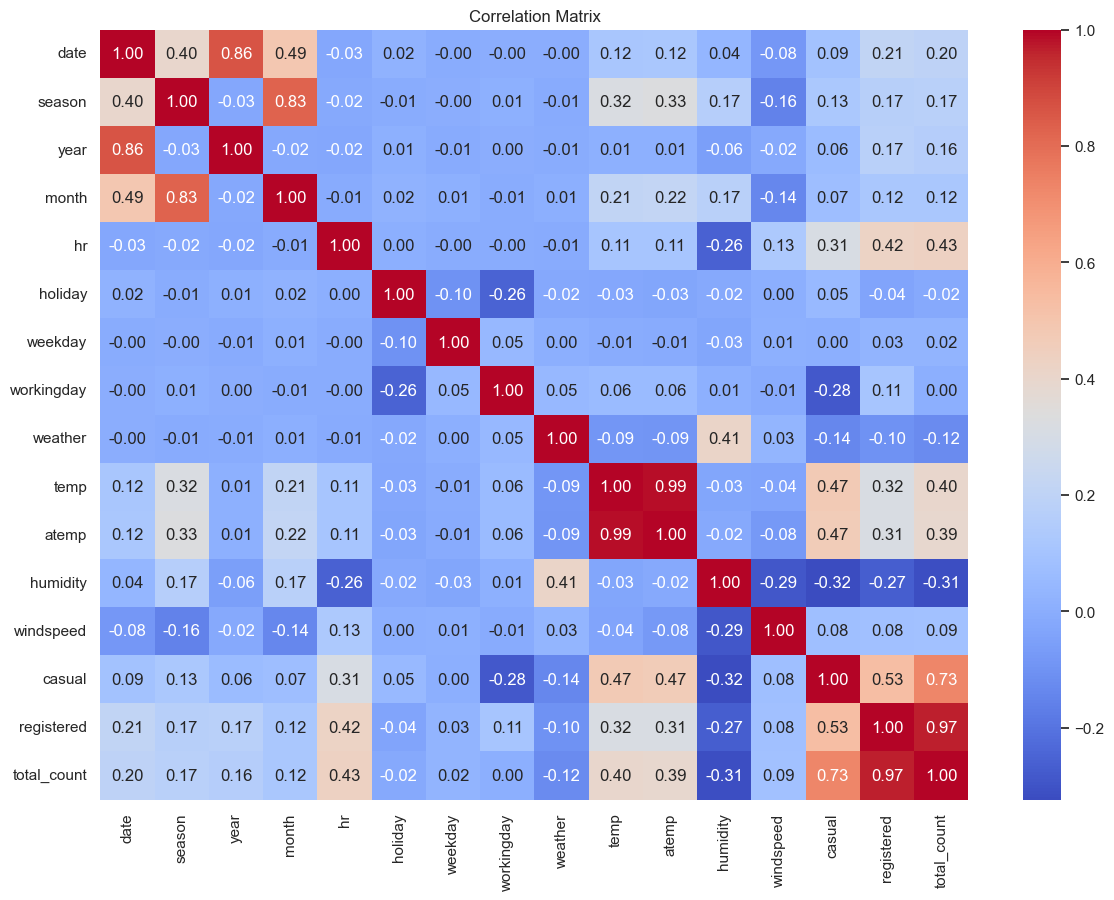

In [420]:

# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

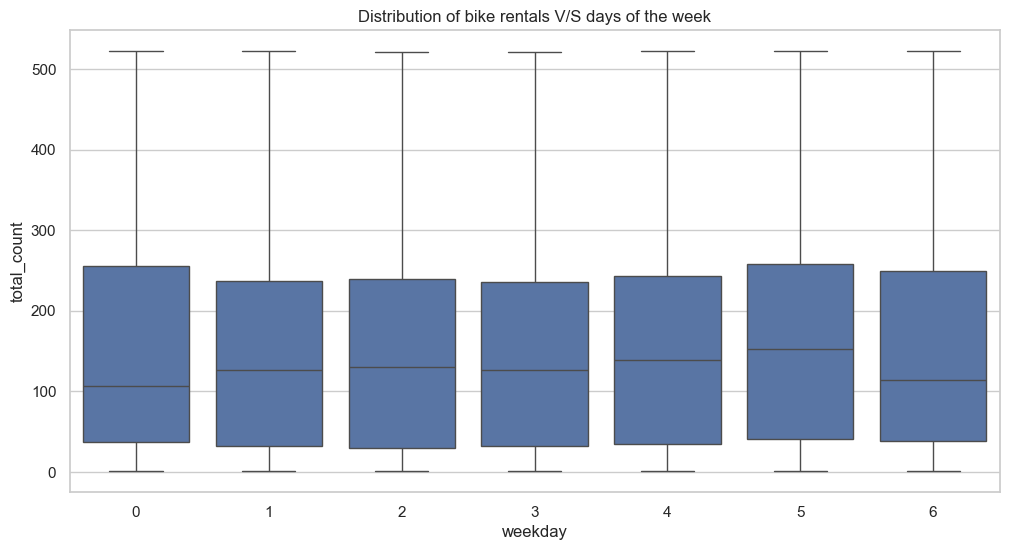

In [421]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='total_count', data=df_copy)
plt.title('Distribution of bike rentals V/S days of the week')

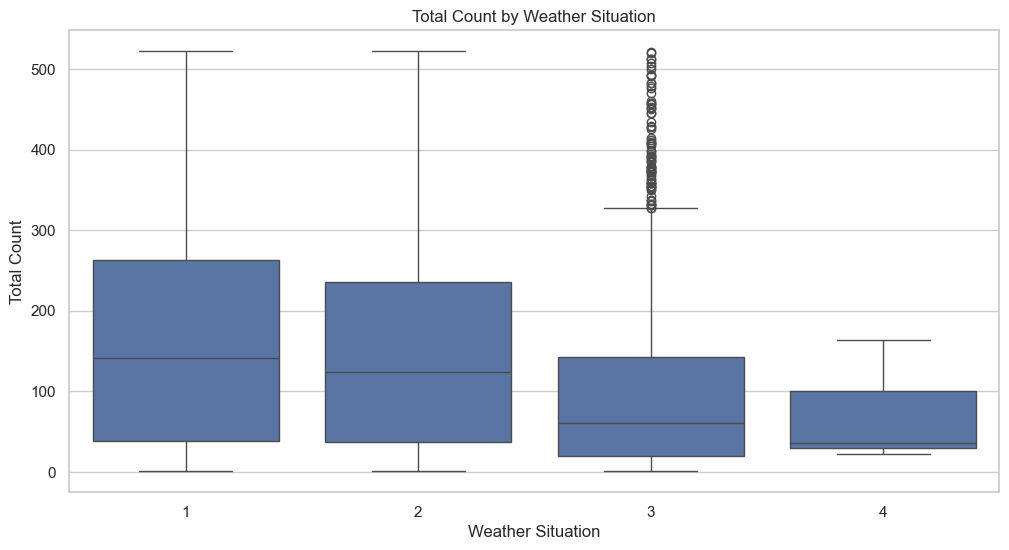

In [422]:

# Box plot for total_count by weather situation
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='total_count', data=df_copy)
plt.title('Total Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Count')
plt.show()

# weathersit : 
		# - 1: Clear and Few clouds
		# - 2: Mist + Cloudy
		# - 3: Light Rain/Snow
		# - 4: Heavy Rain/Snow

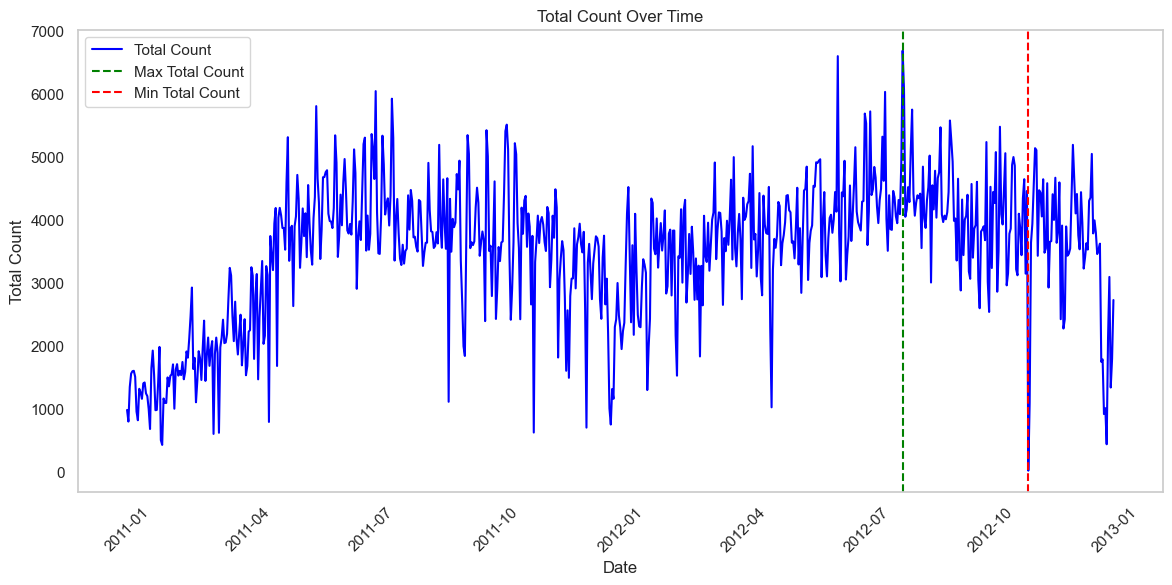

In [423]:
# Grouping by date and sum the total_count
daily_counts = df_copy.groupby('date')['total_count'].sum()

# Plotting the time series
plt.figure(figsize=(14, 6))
plt.plot(daily_counts.index, daily_counts.values, label='Total Count', color='blue')

# Add title and labels
plt.title('Total Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)

plt.grid()

# Finding maximum and minimum values
max_count = daily_counts.max()
min_count = daily_counts.min()
max_date = daily_counts.idxmax()
min_date = daily_counts.idxmin()

# Adding vertical lines for maximum and minimum
plt.axvline(x=max_date, color='green', linestyle='--', label='Max Total Count')
plt.axvline(x=min_date, color='red', linestyle='--', label='Min Total Count')

plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

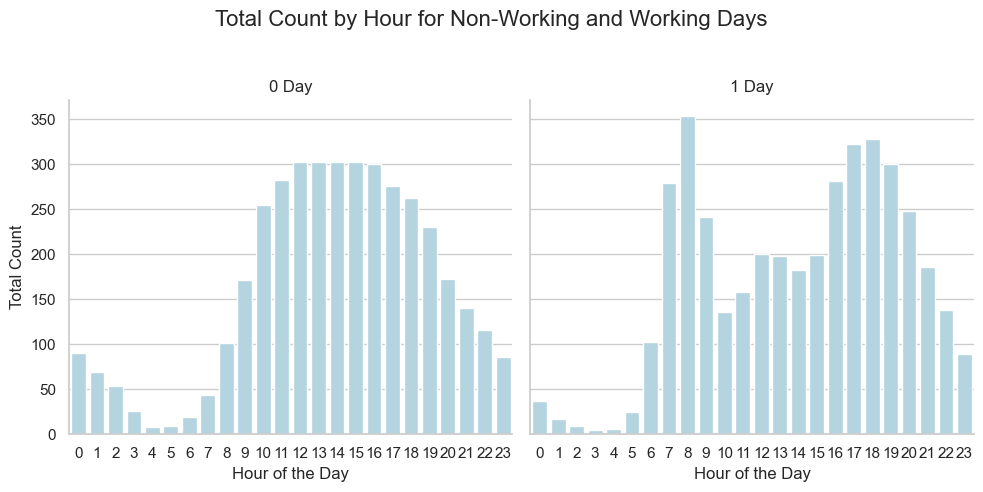

In [424]:

sns.set(style="whitegrid")

# Creating a FacetGrid to plot total_count by hour for working and non-working days
plt.figure(figsize=(12, 6))
d = sns.FacetGrid(df_copy, col="workingday", hue="workingday", height=5, aspect=1)
d.map(sns.barplot, "hr", "total_count",  errorbar=None, color = 'lightblue',order= None)

# Adding titles and labels
d.set_axis_labels("Hour of the Day", "Total Count")
d.set_titles(col_template="{col_name} Day")
plt.subplots_adjust(top=0.8)
d.fig.suptitle('Total Count by Hour for Non-Working and Working Days', fontsize=16)

plt.show()


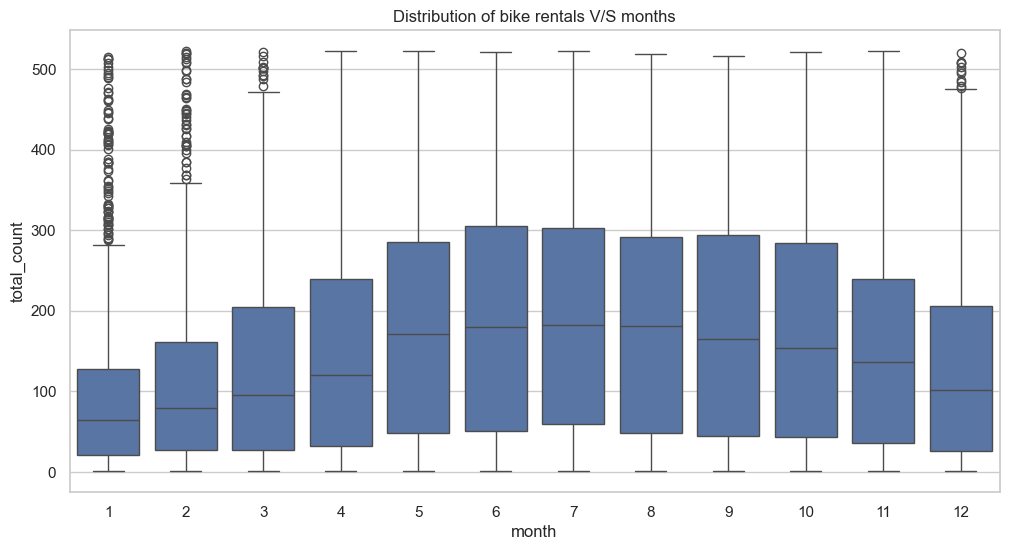

In [425]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='total_count', data=df_copy)
plt.title('Distribution of bike rentals V/S months')
plt.show()

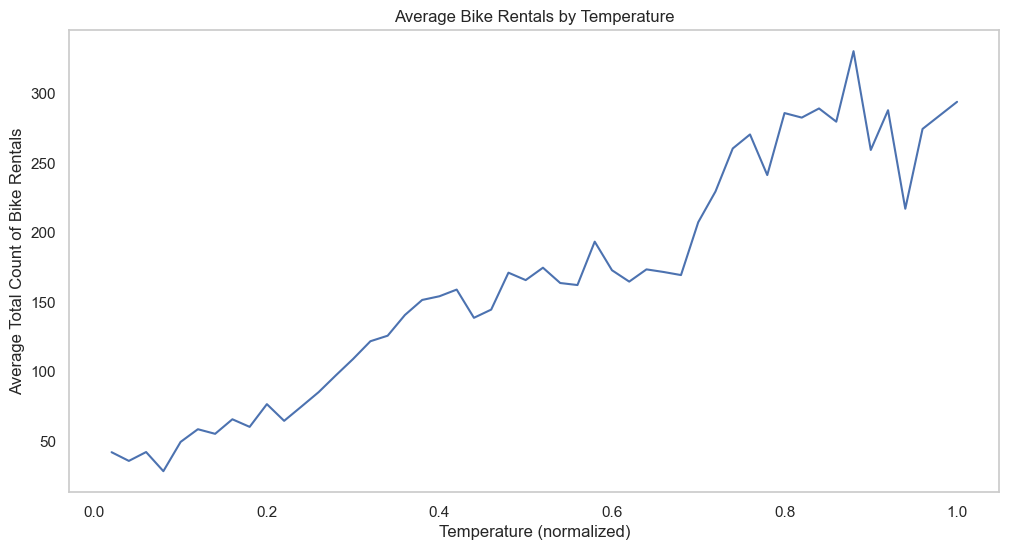

In [426]:
# Group by temperature and calculate the mean total count
temp_count = df_copy.groupby('temp')['total_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='temp', y='total_count', data=temp_count)
plt.title('Average Bike Rentals by Temperature')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Average Total Count of Bike Rentals')
plt.grid()
plt.show()


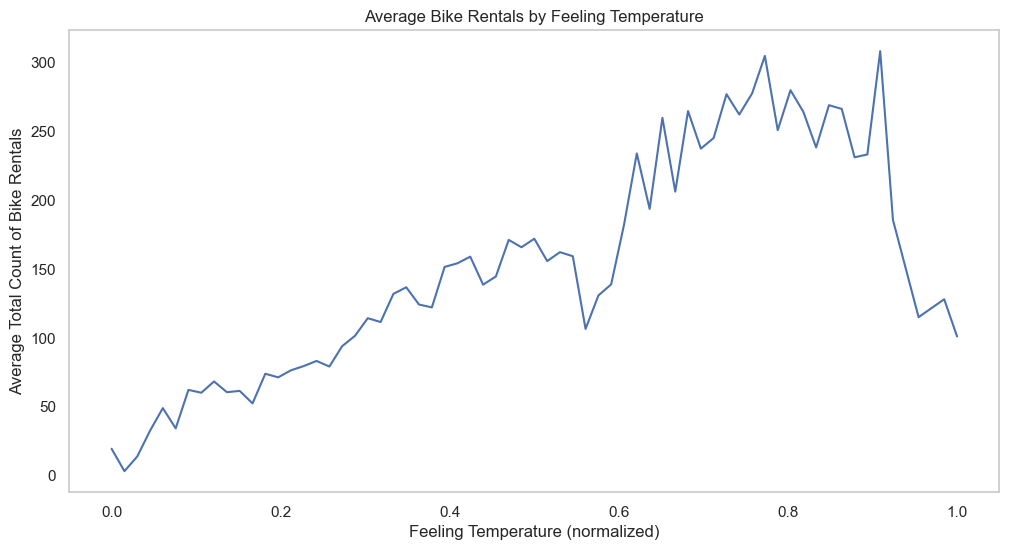

In [427]:
# Group by feeling temperature and calculate the mean total count
atemp_count = df_copy.groupby('atemp')['total_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='atemp', y='total_count', data=atemp_count)
plt.title('Average Bike Rentals by Feeling Temperature')
plt.xlabel('Feeling Temperature (normalized)')
plt.ylabel('Average Total Count of Bike Rentals')
plt.grid()
plt.show()


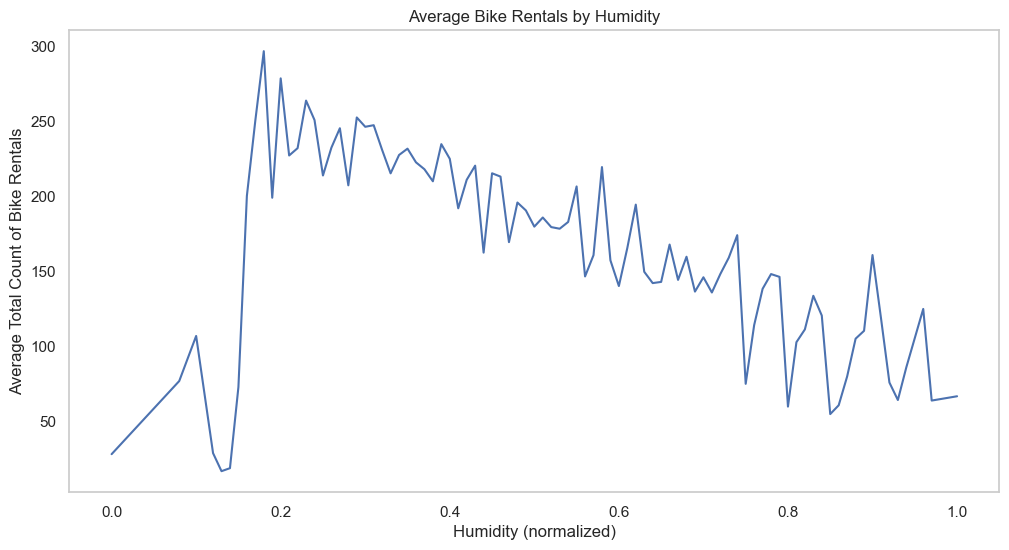

In [428]:

# Group by humidity and calculate the mean total count
humidity_count = df_copy.groupby('humidity')['total_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='humidity', y='total_count', data=humidity_count)
plt.title('Average Bike Rentals by Humidity')
plt.xlabel('Humidity (normalized)')
plt.ylabel('Average Total Count of Bike Rentals')
plt.grid()
plt.show()



## Feature Selection 

In [501]:
df.dtypes

date                 datetime64[ns]
year                          int64
hr                            int64
holiday                       int64
workingday                    int64
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
Weekday_Monday                int32
Weekday_Tuesday               int32
Weekday_Wednesday             int32
Weekday_Thursday              int32
Weekday_Friday                int32
Weekday_Saturday              int32
Weekday_Sunday                int32
Season_Winter                 int32
Season_Spring                 int32
Season_Summer                 int32
Season_Fall                   int32
Weather_Clear                 int32
Weather_Cloudy                int32
Weather_Rain                  int32
Weather_Snow                  int32
Month_January               

#### Adding Rush-Hour feature

In [495]:
# function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (16 <= hour <= 19):
        return 1
    else:
        return 0

df['rush_hour'] = df['hr'].apply(is_rush_hour)

df.head()

,date,year,hr,holiday,workingday,temp,atemp,humidity,windspeed,casual,...,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,hour_sin,hour_cos,rush_hour
0,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,0,0,0.000000,1.000000,0
1,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,0,0,0.258819,0.965926,0
2,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,0,0,0.500000,0.866025,0
3,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,0,0,0.707107,0.707107,0
4,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,0,0,0.866025,0.500000,0


### Distribution of target variable

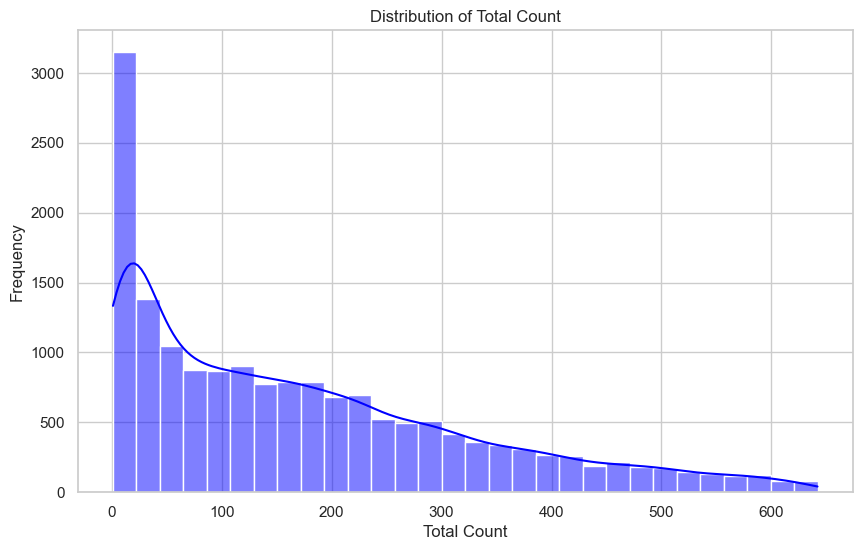

In [496]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram and KDE for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['total_count'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Count')
plt.xlabel('Total Count')
plt.ylabel('Frequency')
plt.show()


### Log - Transforming the target variable as the distribution is right skewed. 

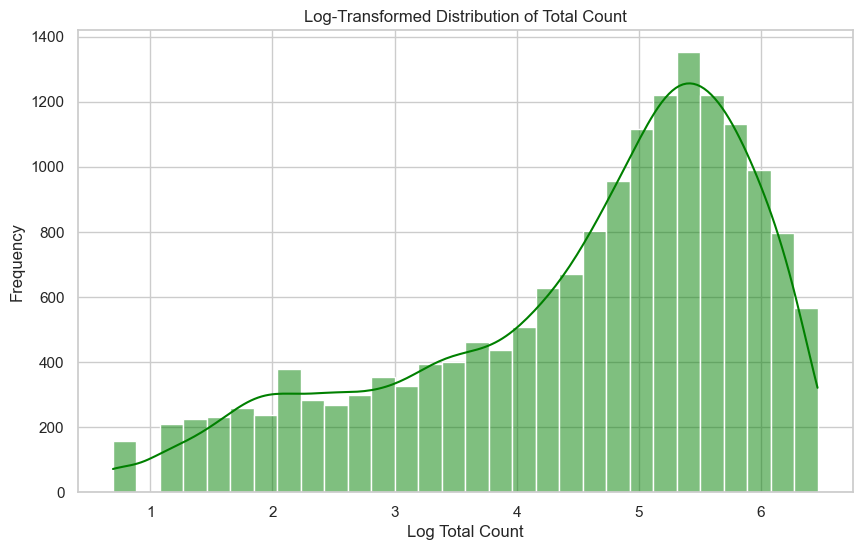

In [497]:
import numpy as np

# Applying log transformation
df['log_total_count'] = np.log1p(df['total_count'])

# Checking the new distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_total_count'], kde=True, bins=30, color='green')
plt.title('Log-Transformed Distribution of Total Count')
plt.xlabel('Log Total Count')
plt.ylabel('Frequency')
plt.show()


#### Correlation Analysis for Numerical Features

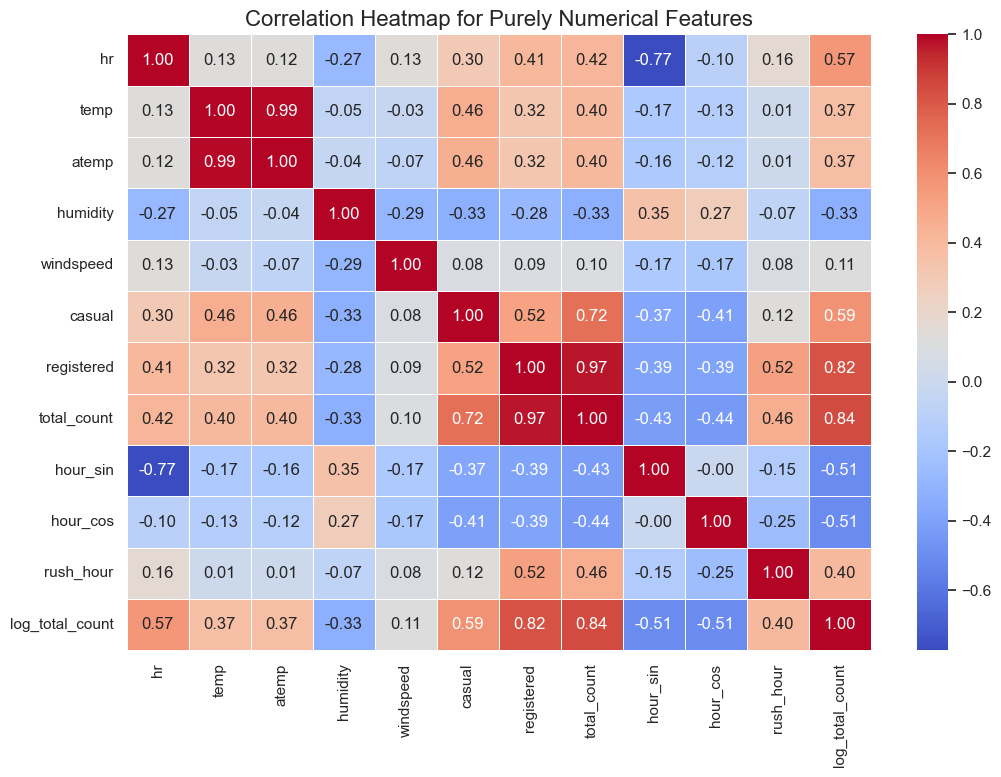

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify purely numerical features (exclude one-hot encoded columns)
numerical_features = [
    'hr', 'temp', 'atemp', 'humidity', 'windspeed', 
    'casual', 'registered', 'total_count', 
    'hour_sin', 'hour_cos', 'rush_hour', 'log_total_count'
]

# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add title
plt.title("Correlation Heatmap for Purely Numerical Features", fontsize=16)
plt.show()


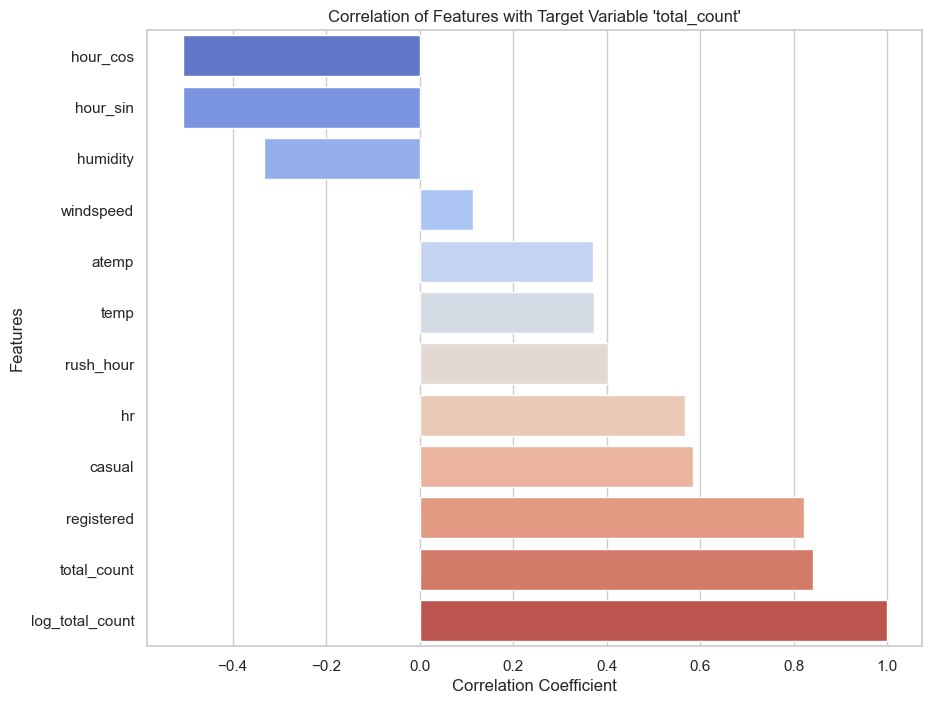

In [503]:

# Calculate correlations with 'total_count'
target_correlation = df[numerical_features].corrwith(df['log_total_count']).sort_values()

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(
    y=target_correlation.index, 
    x=target_correlation.values, 
    hue=target_correlation.index, 
    palette="coolwarm", 
    dodge=False, 
    legend=False
)
plt.title("Correlation of Features with Target Variable 'total_count'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()



In [507]:
df

,date,year,hr,holiday,workingday,temp,atemp,humidity,windspeed,casual,...,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,hour_sin,hour_cos,rush_hour,log_total_count
0,2011-01-01,0,0,0,0,-1.312812,0.2879,0.81,0.0000,3,...,0,0,0,0,0,0,0.000000,1.000000,0,2.833213
1,2011-01-01,0,1,0,0,-1.416735,0.2727,0.80,0.0000,8,...,0,0,0,0,0,0,0.258819,0.965926,0,3.713572
2,2011-01-01,0,2,0,0,-1.416735,0.2727,0.80,0.0000,5,...,0,0,0,0,0,0,0.500000,0.866025,0,3.496508
3,2011-01-01,0,3,0,0,-1.312812,0.2879,0.75,0.0000,3,...,0,0,0,0,0,0,0.707107,0.707107,0,2.639057
4,2011-01-01,0,4,0,0,-1.312812,0.2879,0.75,0.0000,0,...,0,0,0,0,0,0,0.866025,0.500000,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,19,0,1,-1.208889,0.2576,0.60,0.1642,11,...,0,0,0,0,0,1,-0.965926,0.258819,1,4.787492
17375,2012-12-31,1,20,0,1,-1.208889,0.2576,0.60,0.1642,8,...,0,0,0,0,0,1,-0.866025,0.500000,0,4.499810
17376,2012-12-31,1,21,0,1,-1.208889,0.2576,0.60,0.1642,7,...,0,0,0,0,0,1,-0.707107,0.707107,0,4.510860
17377,2012-12-31,1,22,0,1,-1.208889,0.2727,0.56,0.1343,13,...,0,0,0,0,0,1,-0.500000,0.866025,0,4.127134


#### Chi-Square Test for Categorical Features

In [537]:
from scipy.stats import chi2_contingency

# Selecting categorical columns 
categorical_features = ['holiday', 'workingday','Month_January','Month_February','Month_March','Month_April','Month_May','Month_June','Month_July','Month_August','Month_September','Month_October','Month_November','Month_December','Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Fall','rush_hour','Weekday_Sunday','Weekday_Monday', 'Weekday_Tuesday','Weekday_Wednesday','Weekday_Thursday','Weekday_Friday','Weekday_Saturday', 'Weather_Clear', 'Weather_Cloudy', 
    'Weather_Rain', 'Weather_Snow']

# Perforing Chi-Square test for each categorical feature
chi_square_results = {}
for feature in categorical_features:
    table = pd.crosstab(df[feature], df['log_total_count'])
    chi2, p, dof, expected = chi2_contingency(table)
    chi_square_results[feature] = p

# Display features with significant p-values (e.g., p < 0.05)
significant_features = {k: v for k, v in chi_square_results.items() if v < 0.05}
print("Significant Categorical Features based on Chi-Square Test:\n", significant_features)


Significant Categorical Features based on Chi-Square Test:
 {'workingday': 2.3520739826517692e-18, 'Month_January': 4.7910736489822495e-21, 'Month_February': 3.0442054102823264e-07, 'Month_March': 0.006720660665910928, 'Month_May': 8.298690825027967e-10, 'Month_June': 8.573646499231282e-16, 'Month_July': 2.8930480042791373e-13, 'Month_August': 1.282335737481971e-10, 'Month_September': 2.150219588641664e-06, 'Month_October': 7.929779148258162e-05, 'Season_Winter': 6.474899074806989e-124, 'Season_Spring': 0.0018200975812673814, 'Season_Summer': 2.9000402447525005e-39, 'Season_Fall': 9.415849528153757e-05, 'rush_hour': 0.0, 'Weekday_Sunday': 0.0010153958294252677, 'Weekday_Monday': 2.3030931557455227e-07, 'Weekday_Friday': 0.014020632035142993, 'Weekday_Saturday': 0.010514721106835928, 'Weather_Clear': 0.00039586533881129143, 'Weather_Rain': 0.00015240147006027167}


### Features like temp, atemp, humidity are already normalized.  

### Scaling hour_sin and hour_cos

In [436]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['hour_cos', 'hour_sin']] = scaler.fit_transform(df[['hour_cos', 'hour_sin']])

### Selecting the features

In [539]:
# on the basis of correlation analysis and chi-square test, selecting features for model training
selected_features = [
    'workingday', 'Season_Winter', 'Season_Spring', 
    'Season_Summer', 'Season_Fall', 'rush_hour', 
    'hr', 'atemp', 'hour_cos', 'hour_sin','Weekday_Sunday','Weekday_Monday', 'Weekday_Tuesday','Weekday_Wednesday','Weekday_Thursday','Weekday_Friday','Weekday_Saturday','Weather_Clear', 'Weather_Cloudy',  'Month_January', 'Month_February', 'Month_March',
    'Month_April', 'Month_May', 'Month_June', 'Month_July',
    'Month_August', 'Month_September', 'Month_October',
    'Month_November', 'Month_December',
    'Weather_Rain', 'Weather_Snow'
]

# Separating the selected features and target variable
X = df[selected_features]
y = df['log_total_count']


print("Selected Features for the Model:")
X.head()
df[selected_features]

Selected Features for the Model:


,workingday,Season_Winter,Season_Spring,Season_Summer,Season_Fall,rush_hour,hr,atemp,hour_cos,hour_sin,...,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,Weather_Rain,Weather_Snow
0,0,1,0,0,0,0,0,0.2879,1.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0.2727,0.965926,0.258819,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,2,0.2727,0.866025,0.500000,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,3,0.2879,0.707107,0.707107,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,4,0.2879,0.500000,0.866025,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,0,0,0,1,19,0.2576,0.258819,-0.965926,...,0,0,0,0,0,0,0,1,0,0
17375,1,1,0,0,0,0,20,0.2576,0.500000,-0.866025,...,0,0,0,0,0,0,0,1,0,0
17376,1,1,0,0,0,0,21,0.2576,0.707107,-0.707107,...,0,0,0,0,0,0,0,1,0,0
17377,1,1,0,0,0,0,22,0.2727,0.866025,-0.500000,...,0,0,0,0,0,0,0,1,0,0


## Modeling

### Applying Linear Regression 

In [524]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [525]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [543]:
# Predictions
y_pred = lr.predict(X_test)

### Model Performance 

In [527]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation Metrics
print("Linear Regression Results:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")



Linear Regression Results:
R² Score: 0.6802
Mean Absolute Error (MAE): 0.6116


### Residual Distribution plot

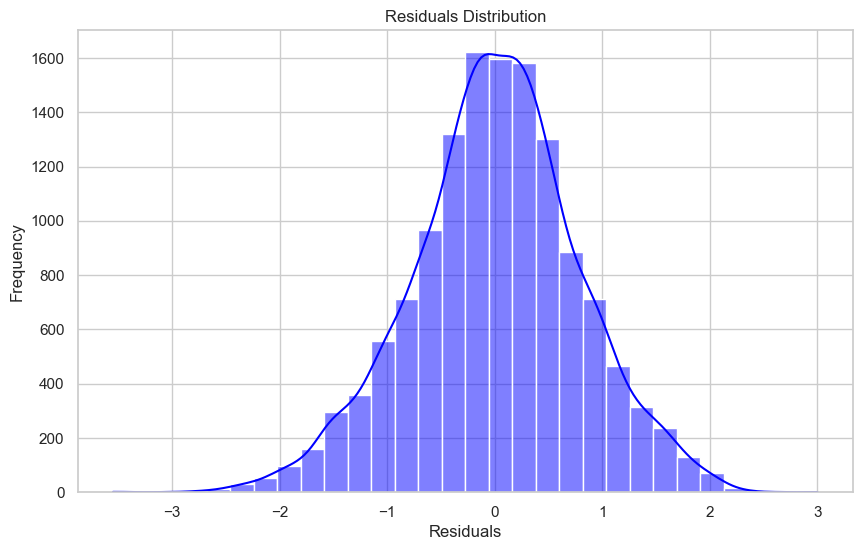

In [517]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()




### Residual Distribution Plot Interpretation:
The residual plot shows the distribution of the residuals (difference between the actual and predicted values). Here's what it indicates:

1. Normal Distribution: The residuals appear to follow a roughly normal distribution, centered around zero. This is a good sign, as it indicates that the model is not systematically overpredicting or underpredicting.

2. Symmetry: The distribution is symmetric, meaning the errors are distributed evenly across all predictions.

3. No Significant Skewness: There is no strong skewness in the residuals, suggesting the model is not biased toward predicting too high or too low.

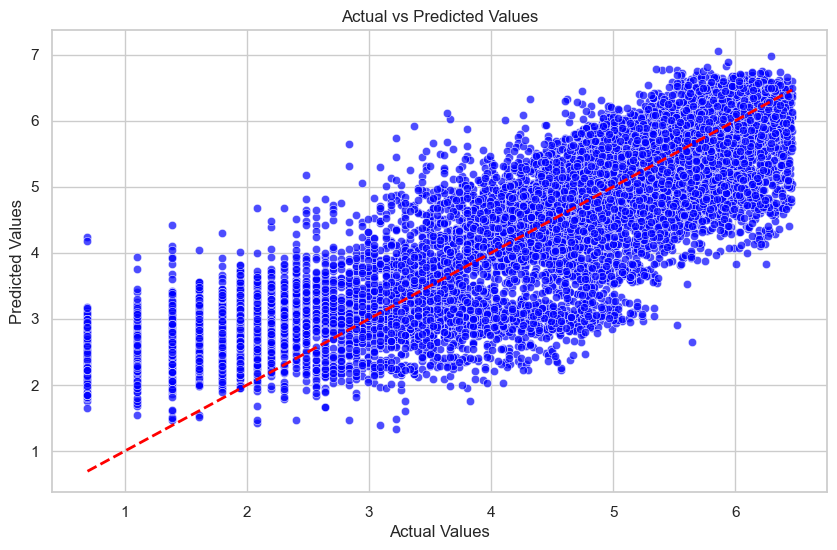

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values (from your model)
predicted = lr.predict(X_test)

# Actual values (from your dataset)
actual = y_test

plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual, y=predicted, alpha=0.7, color='blue')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red', linestyle='--', linewidth=2)  # Ideal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


### Interpretation of the Scatter Plot
The scatter plot compares the actual values of your target variable (log_total_count) with the predicted values from your linear regression model. Here's what it shows:

1. Positive Correlation:

* The predicted values generally follow the actual values along the red dashed line (which represents the ideal scenario where predictions perfectly match actual values). This suggests that the model is capturing some relationships between the features and the target variable.

2. Deviation from Ideal Line:

* There is some scatter around the red line, particularly at the lower and higher ends of the actual values. This indicates that the model struggles to predict these ranges accurately, leading to residual errors.
 
3. Spread in Predictions:

* At certain ranges of the actual values (e.g., below 3 or around 4–5), the predicted values exhibit a wider spread and this could suggest non-linearity in the relationships that the linear model isn't capturing.

### Random Forest Model 

In [530]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
print("\nRandom Forest Results:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")




Random Forest Results:
R² Score: 0.8966
MAE: 0.3321


### Results Interpretation
1. R² Score (0.8966):

* The R² score, or coefficient of determination, indicates that 89.66% of the variance in the target variable (log_total_count) is explained by the features in the dataset using the Random Forest model. This is a high value, suggesting a good fit.
Compared to the previous Linear Regression R² score of 0.6802, the improvement shows that Random Forest captures complex, non-linear relationships in the data better than a linear model.

2. Mean Absolute Error (MAE: 0.3321):

* MAE measures the average absolute difference between the predicted and actual values, with lower values indicating better accuracy.
* The MAE of 0.3321 means, on average, the model's predictions are only off by 0.33 (in log scale) for the target variable.

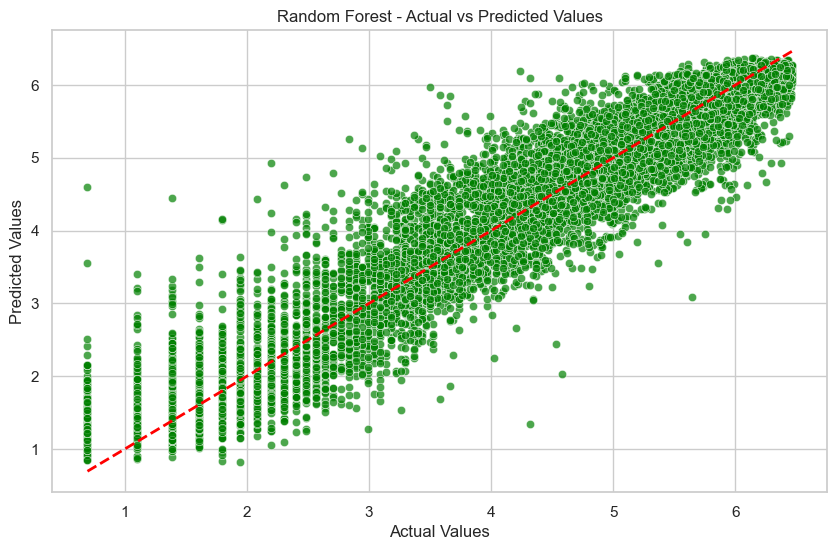

In [544]:

# Actual values (from your dataset)
actual_rf = y_test

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_rf, y=y_pred_rf, alpha=0.7, color='green')
plt.plot([actual_rf.min(), actual_rf.max()], [actual_rf.min(), actual_rf.max()], color='red', linestyle='--', linewidth=2)  # Ideal line
plt.title("Random Forest - Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Model Optimization

In [542]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge(random_state=42)

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Ridge:", grid_search.best_params_)
print("Best R² Score for Ridge:", grid_search.best_score_)


Best Parameters for Ridge: {'alpha': 1}
Best R² Score for Ridge: 0.694852104989935


In [536]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best R² Score: 0.9068135242173799


#### Conclusion
This project successfully addressed the challenge of predicting bike demand (total_count) under varying environmental and temporal conditions. By leveraging regression techniques, the relationships between features and the target variable were effectively modeled.